In [1]:
import pandas as pd 
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [2]:
# # Import CSV
# data = pd.read_csv('us-counties.txt')

In [3]:
# # Extract Florida counties from master dataframe
# florida = data.loc[data['state'] == 'Florida']

In [22]:
# # Convert date column to datetime format
# florida['date'] = pd.to_datetime(florida['date'])

In [23]:
# # Sort dataframe by county and date (was originally sorted by date). Each county had an entry for almost every day 
# # for the last year.
# florida.sort_values(['county', 'date'], axis=0, inplace=True)

In [47]:
# # Import CSV of county population information
# pop = pd.read_csv('florida_county_population2.csv')

In [7]:
# # Add population information to the county rows in main dataframe
# florida = florida.join(pop.set_index('county'), on='county')

In [8]:
# # Create new CSV with just Florida county information including population
#florida.to_csv(r'florida_county_covid.csv', index=False)

In [2]:
# # Import CSV with standardized statistics for cases and deaths
# standard = pd.read_csv('florida_county_covid_stats.csv')

In [3]:
# # Convert date column to datetime format
# standard['date'] = pd.to_datetime(standard['date'])

In [19]:
# # Drop FIPS column
# standard = standard.drop(['fips'], axis=1)

In [11]:
# # Create dataframe for most recent cumulative total for statistics
# recent_tot = standard.loc[standard['date'] == '2021-03-28']

In [13]:
# # Save most recent cumulative total as CSV for use in PowerBI
#recent_tot.to_csv(r'florida_county_totals.csv', index=False)

In [14]:
from scipy import stats

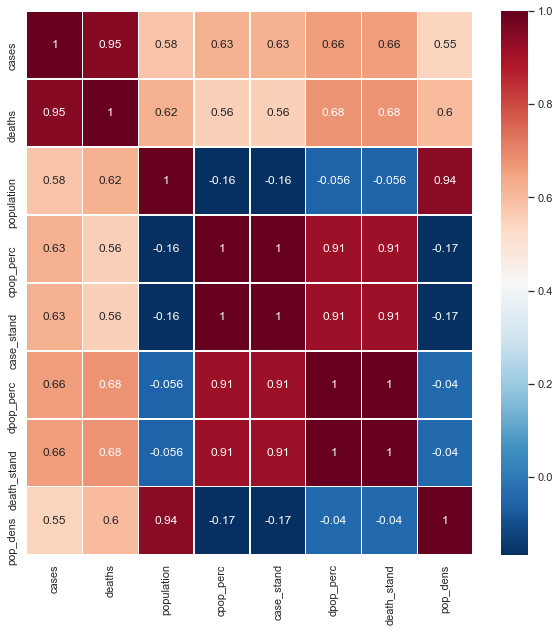

In [20]:
spearmancorr = standard.corr(method='spearman')

fig, ax = plt.subplots(figsize=(10,10))         
sb.heatmap(spearmancorr, 
           xticklabels=spearmancorr.columns,
           yticklabels=spearmancorr.columns,
           cmap='RdBu_r',
           annot=True, linewidths= .5, ax=ax)
sb.set()

In [24]:
# # Save standardized data to CSV
#standard.to_csv(r'florida_county_covid_stats.csv', index=False)

In [42]:
# # Import population density CSV
# density = pd.read_csv('populationdensity.csv')

# # Clean up original population density data
# density = density.rename(columns={'Rank':'rank', 'Population Density ?':'pop_dens', 'County / Population':'county'})
# density['pop_dens']= density['pop_dens'].str.split('/', n = 1, expand = True)
# countypop = density['county'].str.split('/', n=1, expand=True)
# density['county'] = countypop[0]
# density['population'] = countypop[1]
# density['population'] = density['population'].str.replace(',','')
# density['pop_dens'] = density['pop_dens'].str.replace(',','')
# density['county'] = density['county'].str.replace(', FL','')

# # Save as new CSV
# density.to_csv(r'populationdensity2.csv', index=False)

In [81]:
# # Import new population density CSV
# density2 = pd.read_csv('populationdensity2.csv')

# # Add updated population numbers to density CSV
# density2['county'] = density2['county'].str.rstrip()
# density2 = density2.drop(columns=['population'])
# density2 = density2.join(pop.set_index('county'), on='county')
# density2['county'] = density2['county'].astype(str) + ' Florida'
# density2.to_csv(r'populationdensity3.csv', index=False)

In [4]:
# # Import final population density CSV for updated 2020 population data
# density3 = pd.read_csv('populationdensity3.csv')

In [6]:
# # Extract population density and county columns into new dataframe
# dens_county = density3[['county', 'pop_dens']]

In [ ]:
# dens_county['county'] = dens_county['county'].str.replace(' Florida','')

In [12]:
# # Add population density information to standardized dataframe
# standard = standard.join(dens_county.set_index('county'), on='county')